In [20]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.text as txt
import matplotlib.lines as lines
from matplotlib.colors import ListedColormap
import time
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from IPython import display
import pylab as pl
%matplotlib inline
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


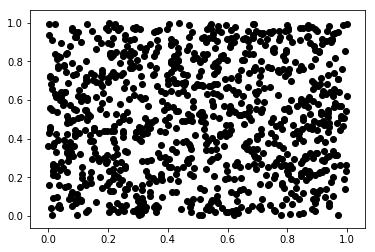

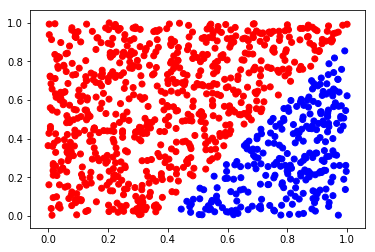

In [21]:
# generate uniformly sampled data
delta = 0.1
w1 = 4.5
w2 = -3
X = np.random.uniform(size=[1000,2])
# split in two classes using a linear boundary
y = np.zeros([X.shape[0],1])
for i in range(X.shape[0]):
    if w1*X[i,0] + w2*X[i,1] > 1.75 + delta:
        y[i] = 1
    elif w1*X[i,0] + w2*X[i,1] < 1.75 - delta:
        y[i] = 0
    else:
        y[i] = -1
# remove examples with negative labels
inds = np.where(y != -1)[0]
X = X[inds,:]
y = y[inds]
# plot data
plt.scatter(X[:,0],X[:,1],c='k')
plt.show()
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_bright)

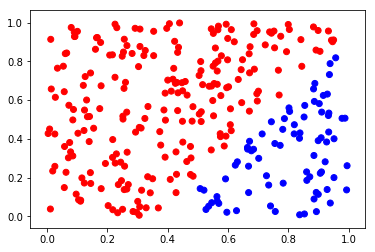

In [35]:
# sample training data
tr = np.random.permutation(len(y))[0:300]
trainX = X[tr,:]
trainy = y[tr].ravel()
plt.scatter(trainX[:,0],trainX[:,1],c=trainy,cmap=cm_bright)

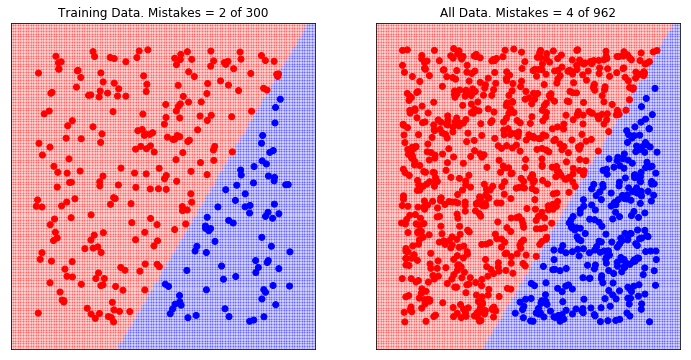

In [36]:
# learn a perceptron
clf = Perceptron()
clf.fit(trainX, trainy) 
trainMistakes = len(np.where(clf.predict(trainX) != trainy)[0])
aM = np.where(clf.predict(X) != y.ravel())[0]
allMistakes = len(aM)

# plot the decision surface
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,2,1)
plotBoundary(trainX,trainy,clf,ax)
ax.set_title('Training Data. Mistakes = %d of %d'%(trainMistakes,len(trainy)))
ax = fig.add_subplot(1,2,2)
plotBoundary(X,y,clf,ax)
ax.set_title('All Data. Mistakes = %d of %d'%(allMistakes,len(y)))


In [25]:
def plotBoundary(X,y,clf,ax):
    h = .01  # step size in the mesh

    X1_min, X1_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    X2_min, X2_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    X1_, X2_ = np.meshgrid(np.arange(X1_min, X1_max, h),np.arange(X2_min, X2_max, h))
    Xpred = np.c_[X1_.ravel(), X2_.ravel()]
    ypred = clf.predict(Xpred)
    ypred = ypred.reshape(X1_.shape)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.pcolormesh(X1_, X2_, ypred, cmap=cm_bright,alpha=.2)
    sp = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    
    ax.set_xlim(X1_.min(), X1_.max())
    ax.set_ylim(X2_.min(), X2_.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [14]:
delta = 0.5
eps = 0.5
d  = 2
minm = (1/eps)*((8*(d+1)*np.log2(13/eps)) + 4*np.log2(2/delta))
print(minm)

241.621106471
